### Lab3: Analyzing a real world data-set with SQL and Python

#### Introduction

This notebook shows how to store a dataset into a database using and analyze data using SQL and Python. In this lab you will:
1. Understand a dataset of selected socioeconomic indicators in Chicago
1. Learn how to store data in an Db2 database on IBM Cloud instance
1. Solve example problems to practice your SQL skills 

#### Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


##### Connect to database using "SQL magic" extension

In [4]:
import pandas as pd

In [65]:
import seaborn as sns

In [64]:
import matplotlib.pyplot as plt

In [1]:
%load_ext sql

In [3]:
##connection string from the previous lab
%sql ibm_db_sa://zcl11296:8qml-p1w2w8js19m@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB

'Connected: zcl11296@BLUDB'

##### Store the dataset in a Table
In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.  
We will first read the dataset source .CSV from the internet into pandas dataframe  
Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table

In [6]:
chicago_soc_data = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_soc_data

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_soc_data'

Checking if the table was created

In [8]:
%sql select * from chicago_soc_data limit 5;
## hurray

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [72]:
data = %sql select * from chicago_soc_data

data_df = data.DataFrame()

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


### Problems

#### Problem 1: How many rows are in the dataset?

In [47]:
rows = %sql select count(*) as "lala" from chicago_soc_data
first_row = rows[0]
all_rows = first_row['lala']

print("There are", all_rows, "rows in the dataset")

#I guess this is not the best solution to transform the final answer from sql table to int in variable, but it worked. 
#but it's not int, its decimal. this is not python type, right? 
#questions for future self.. 

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.
There are 78 rows in the dataset


#### Problem 2: How many community areas in Chicago have a hardship index greater than 50.0?

In [57]:
%sql select count(hardship_index) from chicago_soc_data where hardship_index > 50
# !!! you don't need ""/'' when using columns names

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


#### Problem 3: What is the maximum value of hardship index in this dataset?

In [60]:
max_hard_index = %sql select max(hardship_index) from chicago_soc_data
max_hard_index_temp = max_hard_index[0]
max_hard_index_int = max_hard_index_temp['1']

print("The maximum value of hardship index is", max_hard_index_int)

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.
The maximum value of hardship index is 98.0


#### Problem 4: Which community area which has the highest hardship index?


In [61]:
%sql select community_area_name from chicago_soc_data where hardship_index = (select max(hardship_index) from chicago_soc_data)

# There are different solutions for this question: 
## We can use the result of the last query to as an input to this query:
##%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

## or another option:
##%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;
# This one is interested, i;ve never used NULLS LAST FETCH FIRST ROW ONLY

## or you can use a sub-query to determine the max hardship index:
##%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

##Correct answer: 'Riverdale'

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


#### Problem 5: Which Chicago community areas have per-capita incomes greater than $60,000?

In [62]:
%sql select community_area_name from chicago_soc_data where per_capita_income_ > 60000

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


#### Problem 6: Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.

In [73]:
#cheking if the dataframe is correct and working
data_df.head()

,index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


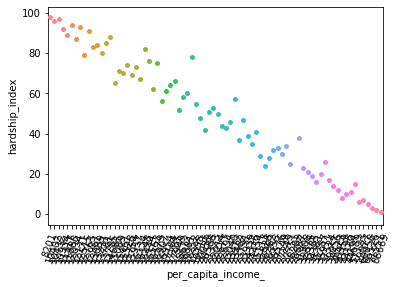

In [76]:
%matplotlib inline
plot = sns.swarmplot(x="per_capita_income_", y="hardship_index", data=data_df)
plt.setp(plot.get_xticklabels(), rotation = 70)
plt.show()

 * ibm_db_sa://zcl11296:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


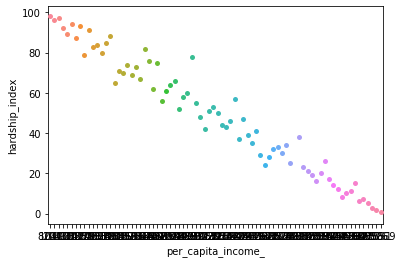

In [82]:
income_and_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_soc_data
income_and_hardship_df = income_and_hardship.DataFrame()

plot = sns.swarmplot(x="per_capita_income_", y="hardship_index", data=income_and_hardship_df)

The swarmplot is a little bad for this problem, as it takes all incomes as separate units and it doesn't group them for better visuals. However, even in this plot we can see the negative correlation between Income per capita and hardship index. Which means that when the income is increasing, the hardship index is decreasing (corellation does not mean causation). But there is negative relation between these two variables

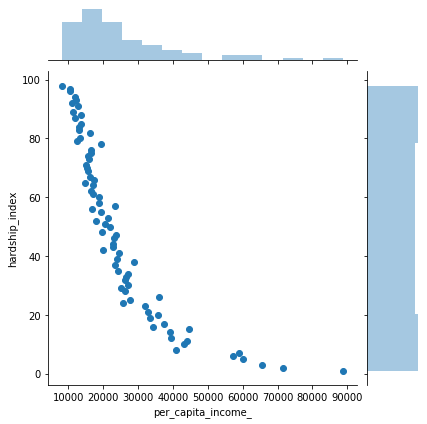

In [84]:
#let's take a look at the join plot

plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_and_hardship_df)

We can see the same negative correlation here as well, as the Income per Capita is rising, the Hardship Index is getting lower. 